In [1]:
import adspy_shared_utilities as asu

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
a = ("John", "Charles", "Mike", "Mike","Charles")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)

for i in x:
    print(i)

In [ ]:
(fruits.fruit_label.unique())

In [ ]:
(fruits.fruit_name.unique())

In [ ]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

#### Examine the data a little bit


In [ ]:
fruits.head()


In [4]:
X = fruits[['mass','width', 'height',  'color_score']]
#X = fruits[['color_score']]

X.head()


,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [5]:
y = fruits['fruit_label']
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

<IPython.core.display.Javascript object>


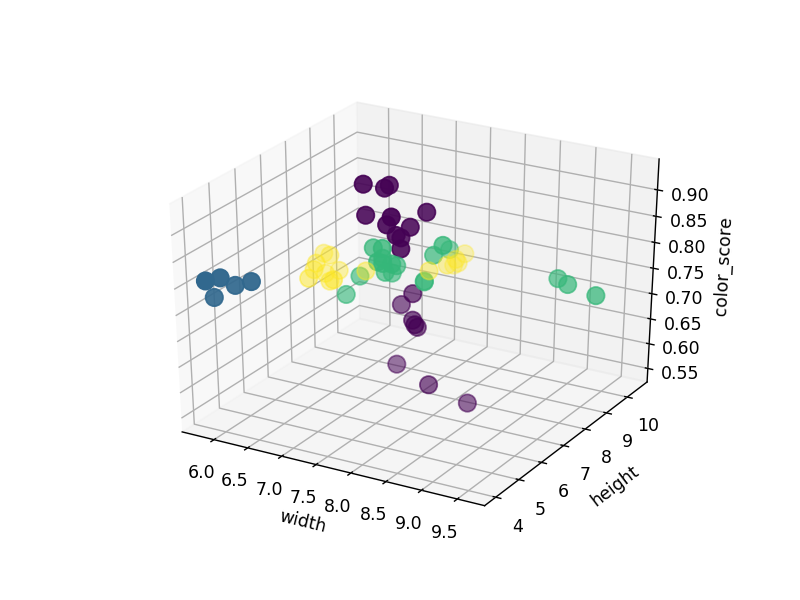

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = y, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [ ]:
# For the first step is to split into train/test


# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Setting random_state a fixed value will guarantee that 
# same sequence of random numbers are generated each time you run the code

In [ ]:
#Create the classifier object. 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
### Train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

In [ ]:
### Estimate the accuracy of the classifier on future data, using the test data
print(knn.score(X_train, y_train),knn.score(X_test, y_test))

In [ ]:
### Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm and color socore of 0.5 

fruit_prediction = knn.predict([[250, 4.3, 8.5, 0.1]])

fruit_prediction[0]



In [ ]:
lookup_fruit_name[fruit_prediction[0]]

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 8.3, 4.5, 0.31]])
lookup_fruit_name[fruit_prediction[0]]

In [ ]:
### Plot the decision boundaries of the k-NN classifier
asu.plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors


### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?


In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

 



### We can do it  with only colors.


 # I CAN STaRT FROM HERE: 
 

<IPython.core.display.Javascript object>


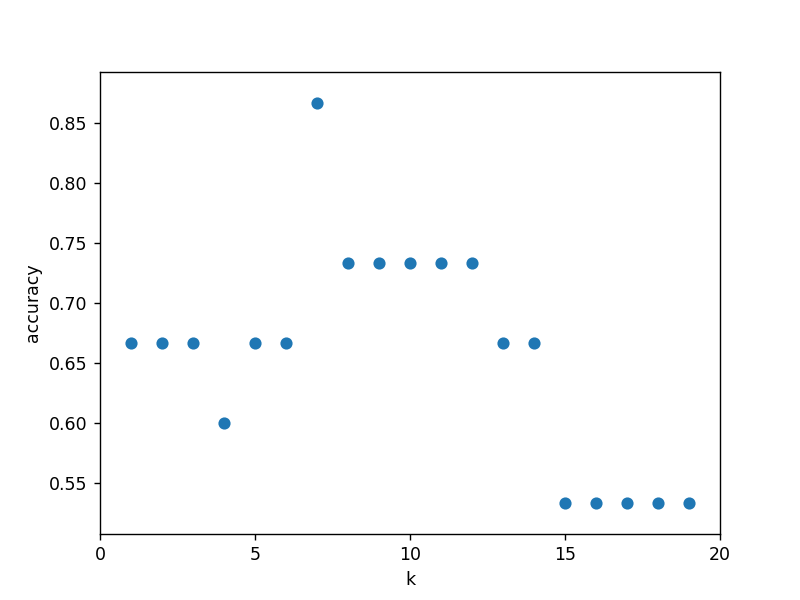

In [23]:

X = fruits[['color_score']]

#X = fruits[['mass','width', 'height',  'color_score']]


# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);



In [24]:
scores

[0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.8666666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333]

### How sensitive is k-NN classification accuracy to the train/test split proportion?
#### Try at home

In [ ]:
t = [0.9, 0.8, 0.70, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t: # s is the training size. 

    scores = []
    for i in range(1,50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy for test set');

# kNN regression.

In [11]:
# kNN regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression #function used for generating synthetic datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso

### Try it for our house data set. 

In [26]:
from sklearn.neighbors import KNeighborsRegressor

house_price = pd.DataFrame (np.genfromtxt("house_price_data_2000.csv", \
            delimiter=";", skip_header=1, dtype=None))
house_price.head()

X_house = house_price.iloc[:  , 0:3] #from 0(inclusive) to 3(exclusive)
y_house = house_price.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, random_state = 2)

knnreg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

# let's make it with cross validation or let's look at the value of neighbourhoods. 

R-squared test score: 0.855


## Now try it for customized computer. 
### We will also see a graph for C and alpha for ridge and k. 

In [27]:
CostData1 = pd.read_excel('CostV1.xlsx')
CostData1.head()

print("Dim-->", CostData1.ndim, "Length->",CostData1.shape)

CostData1["AG-2"] = CostData1["AG-2"].fillna(0) #fill the NaNs with Zeros
CostData1.head()


Dim--> 2 Length-> (38, 10)


,Power,YG,AG-1,AG-2,Con,Uk,Temp,Po,Pk,Cost
0,50,33.0,0.4,0.0,Yzn11,4.4,40,0.105,0.825,1425
1,100,33.0,0.4,0.0,Yzn11,4.4,40,0.170,1.000,1888
2,160,33.0,0.4,0.0,Yzn11,4.4,40,0.242,2.000,2005
3,250,33.0,0.4,0.0,Dyn11,4.4,40,0.345,3.000,2705
4,400,33.0,0.4,0.0,Dyn11,4.4,40,0.495,4.000,3232


In [28]:
CostData1 = pd.get_dummies(CostData1) # 

y_CostData1 = CostData1['Cost']
y_CostData1.head()

0    1425
1    1888
2    2005
3    2705
4    3232
Name: Cost, dtype: int64

In [29]:
X_CostData1 = CostData1.drop("Cost",axis=1)
X_CostData1.head()

,Power,YG,AG-1,AG-2,Uk,Temp,Po,Pk,Con_Dyn11,Con_Dyn11d0,Con_Yzn11
0,50,33.0,0.4,0.0,4.4,40,0.105,0.825,0,0,1
1,100,33.0,0.4,0.0,4.4,40,0.170,1.000,0,0,1
2,160,33.0,0.4,0.0,4.4,40,0.242,2.000,0,0,1
3,250,33.0,0.4,0.0,4.4,40,0.345,3.000,1,0,0
4,400,33.0,0.4,0.0,4.4,40,0.495,4.000,1,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_CostData1, y_CostData1,random_state=5)
linridge = Ridge(alpha=0).fit(X_train, y_train)                                                   

print('LR: Training',round(linridge.score(X_train, y_train),3), 'Test',round(linridge.score(X_test, y_test),3))

#for CostV1.xlsx check for random state 1 and 2 and 5
 
linridge = Ridge(alpha=10).fit(X_train, y_train)                                                   
print('Ridge with alpha=10: Training',round(linridge.score(X_train, y_train),3), 'Test',round(linridge.score(X_test, y_test),3))

LR: Training 0.79 Test -0.969
Ridge with alpha=10: Training 0.718 Test 0.603


<IPython.core.display.Javascript object>


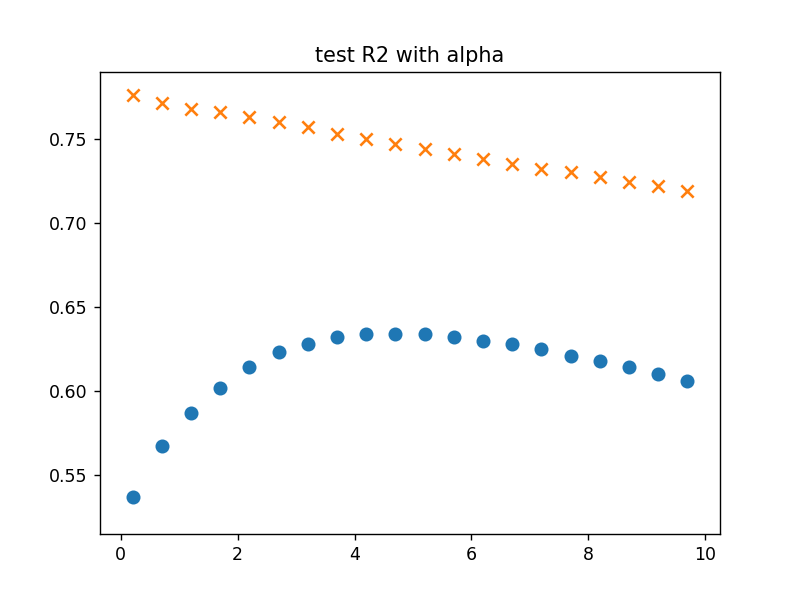

In [32]:
alphaList  = np.arange(0.2, 10, 0.5)

ridgeTrainR2 = {}
ridgeTestR2 = {}

for i in alphaList:
    linridge = Ridge(alpha=i).fit(X_train,y_train)
    ridgeTrainR2[i]= round(linridge.score(X_train, y_train),3)
    ridgeTestR2[i]= round(linridge.score(X_test, y_test),3)
    

plt.figure()
plt.title('test R2 with alpha')
plt.scatter(alphaList, ridgeTestR2.values(), marker= 'o', s=50)
plt.scatter(alphaList, ridgeTrainR2.values(), marker= 'x', s=50)

plt.show()


<IPython.core.display.Javascript object>


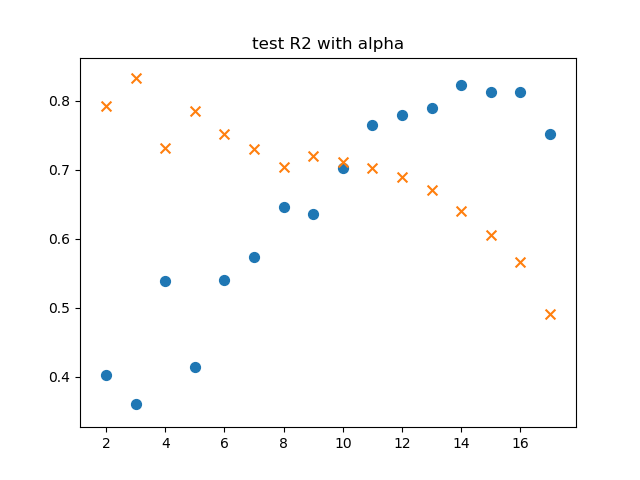

In [18]:
kList =  np.arange(2, 18, 1)

kNNTrainR2= {}
kNNTestR2 = {}

for k in kList:
    kNN = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train) 
    kNNTrainR2[k]= round(kNN.score(X_train, y_train),3)
    kNNTestR2[k]= round(kNN.score(X_test, y_test),3)


plt.figure()
plt.title('test R2 with alpha')
plt.scatter(kList, kNNTestR2.values(), marker= 'o', s=50)
plt.scatter(kList, kNNTrainR2.values(), marker= 'x', s=50)

plt.show()
